In [2]:
#Calcul scientifique avec SCIPY
#Module INTERPOLATE 
from scipy.interpolate import interp1d
#une fonction qui va nous permettre à géner une autre fonction qui serait noitre fonction d'interpolation
import matplotlib.pyplot as plt
import numpy as np

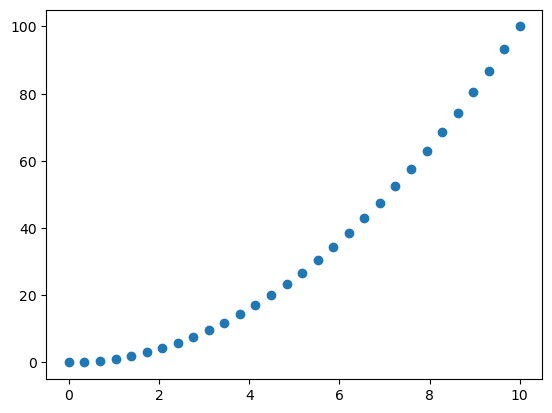

In [3]:
x = np.linspace(0, 10, 30)
y = x**2
plt.scatter(x, y)

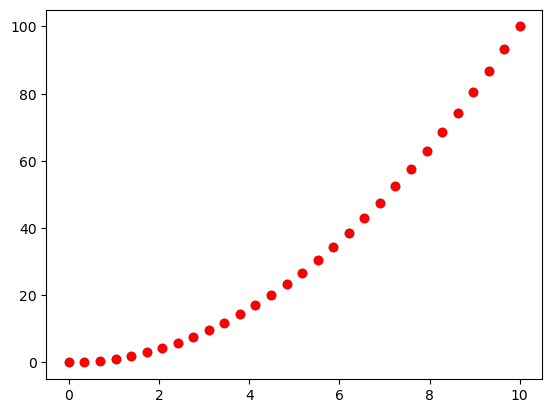

In [4]:
#Ici on va placer plus de pts entre nos différents points bleus
f = interp1d(x, y, kind='linear')

new_x = np.linspace(0, 10, 30)
result = f(new_x)

plt.scatter(x, y)
plt.scatter(new_x, result, c='r')


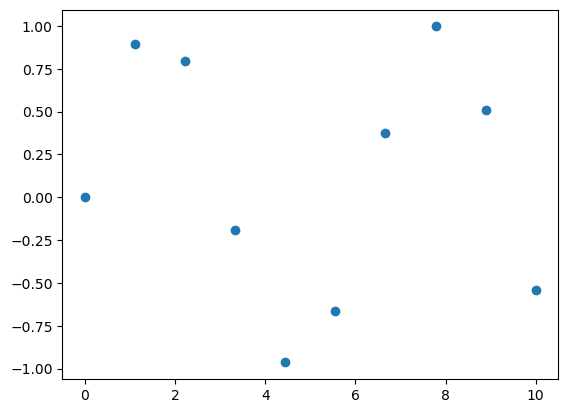

In [5]:
x = np.linspace(0, 10, 10)
y = np.sin(x)
plt.scatter(x, y)

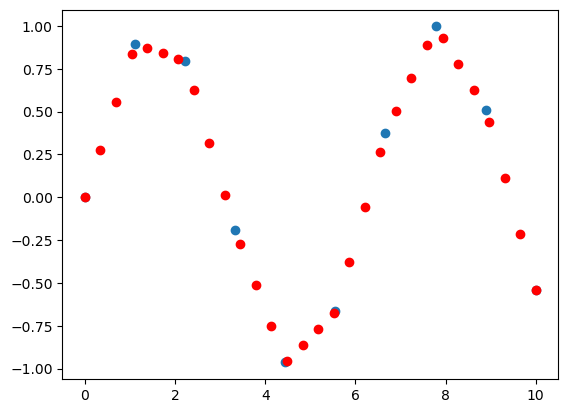

In [6]:
f = interp1d(x, y, kind='linear')

new_x = np.linspace(0, 10, 30)
result = f(new_x)

plt.scatter(x, y)
plt.scatter(new_x, result, c='r')

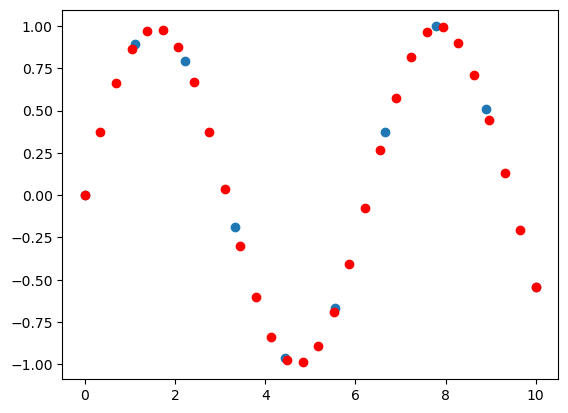

In [7]:
#question aesthetic, on utilisera une interpolation cubic ici
f = interp1d(x, y, kind='cubic')

new_x = np.linspace(0, 10, 30)
result = f(new_x)

plt.scatter(x, y)
plt.scatter(new_x, result, c='r')

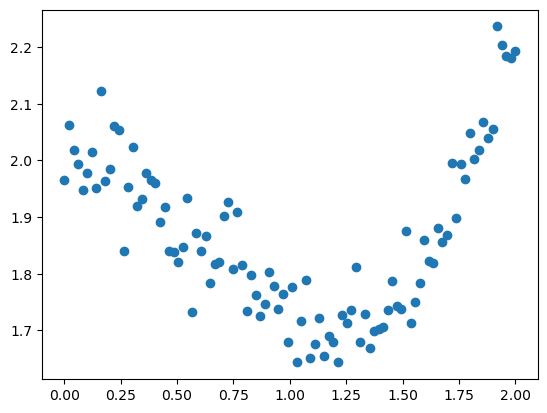

In [8]:
#Module OPTIMIZE
##CURVE FIT
x = np.linspace(0, 2, 100)
y = 1/3*x**3 - 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x, y)

In [9]:
#curve fit se sert de la méthode des moindres carrés  pour trouver les bons paramètres d'un modèle f

def f(x, a , b, c, d):
    return a * x**3 + b * x**2 + c * x + d


In [10]:
from scipy import optimize

In [11]:
optimize.curve_fit(f, x, y)

(array([ 0.33059513, -0.58780855, -0.02571176,  2.01080287]),
 array([[ 0.00111935, -0.00335806,  0.00267297, -0.00043426],
        [-0.00335806,  0.01036758, -0.00860573,  0.00149642],
        [ 0.00267297, -0.00860573,  0.00763639, -0.00150407],
        [-0.00043426,  0.00149642, -0.00150407,  0.0004032 ]]))

In [12]:
params, param_cov = optimize.curve_fit(f, x, y)

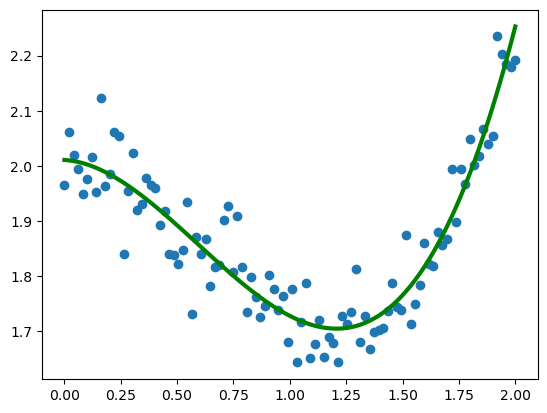

In [13]:
plt.scatter(x, y)
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), c='g', lw=3)

In [14]:
##Minimize = fonction qui permet de minimizer n'import quel fonction mathématique

def f (x):
    return x**2 + 15*np.sin(x)

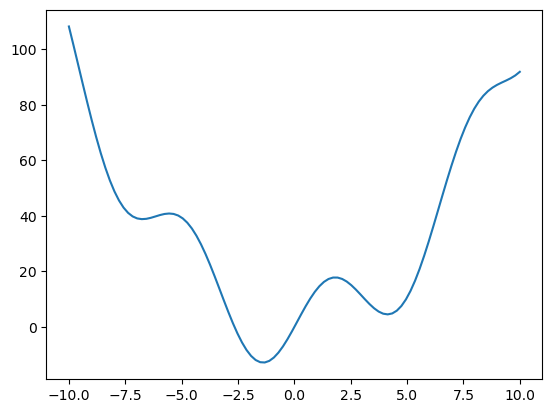

In [15]:
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))

In [16]:
#à parti d'un pt de départ x0= il va éffectuer une algorythme qui va minimizer peu à peu jusqu'au premier minimum qu'il rencontre

optimize.minimize(f, x0=-8)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 38.81120617595851
        x: [-6.738e+00]
      nit: 6
      jac: [ 4.768e-07]
 hess_inv: [[ 1.164e-01]]
     nfev: 14
     njev: 7

In [17]:

optimize.minimize(f, x0=-5)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -12.823616887804414
        x: [-1.385e+00]
      nit: 4
      jac: [ 3.695e-06]
 hess_inv: [[ 5.979e-02]]
     nfev: 18
     njev: 9

In [18]:
x0=-5
result = optimize.minimize(f, x0=x0).x

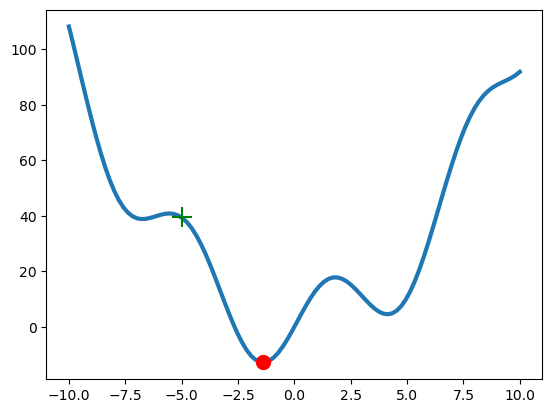

In [19]:
plt.plot(x, f(x), lw=3, zorder=-1)
plt.scatter(result, f(result), s=100, c='r', zorder=1)
plt.scatter(x0, f(x0), s=200, marker='+', c='g', zorder=1)

In [20]:
def f(x):
    return np.sin(x[0]) + np.cos(x[0]+x[1])*np.cos(x[0])

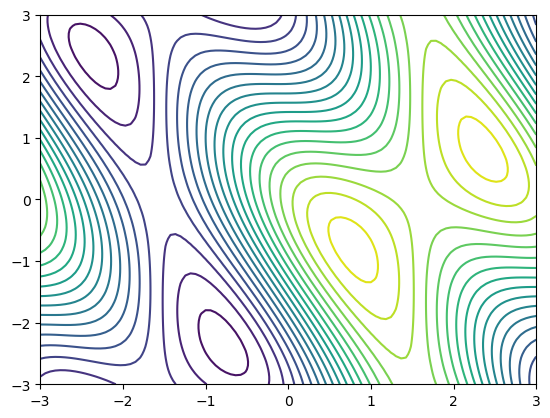

In [21]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

x, y = np.meshgrid(x, y)
plt.contour(x, y, f(np.array([x, y])), 20)

C:\Users\JoJo_\AppData\Local\Temp\ipykernel_3860\2508412554.py:10: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  result = optimize.minimize(f, x0=x0).x


[-0.78539917 -2.35619343]


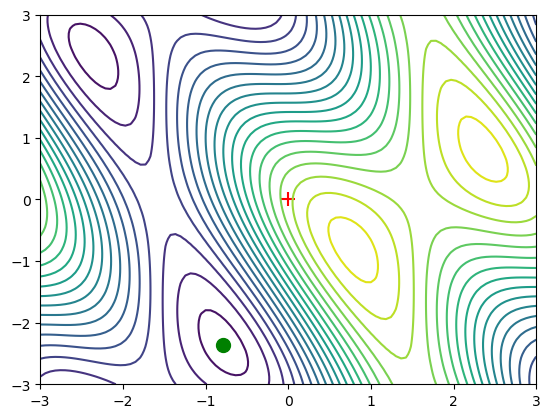

In [22]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

x, y = np.meshgrid(x, y)
plt.contour(x, y, f(np.array([x, y])), 20)

x0 = np.zeros((2, 1))
plt.scatter(x0[0], x0[1], marker='+', c='r', s=100)

result = optimize.minimize(f, x0=x0).x

plt.scatter(result[0], result[1], c='g', s=100)
print(result)

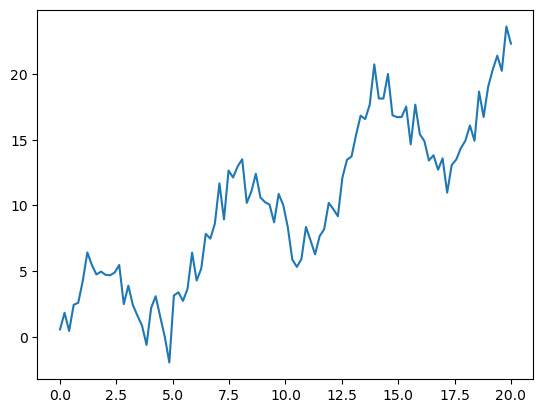

In [23]:
#TRAITEMENT DU SIGNAL
x = np.linspace(0, 20, 100)
y = x + 4*np.sin(x) +np.random.randn(x.shape[0])
plt.plot(x, y)

In [24]:
from scipy import signal

In [25]:
new_y = signal.detrend(y)

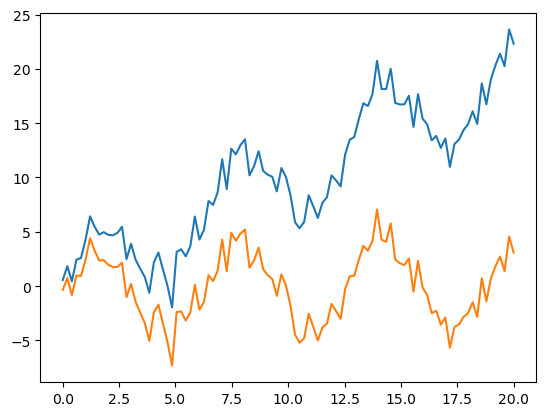

In [26]:
plt.plot(x, y)
plt.plot(x, new_y)
#résultat montrant le nouveau signal avec moins de tendances linéaires

In [27]:
#Transformation de FOURIER
#= analyse les fréquences présentes dans un signal périodique. En résultat = un spectre
# on observera donc les fréquences et en ordonné une amplitude pour chaque fréquence


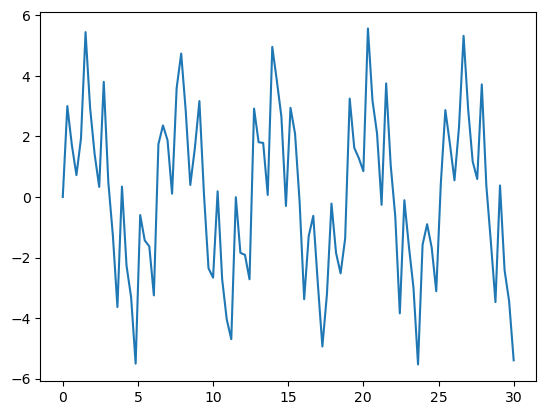

In [28]:
x = np.linspace(0, 30, 100)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x)
plt.plot(x, y)

In [29]:
from scipy import fftpack

C:\Users\JoJo_\Anaconda\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


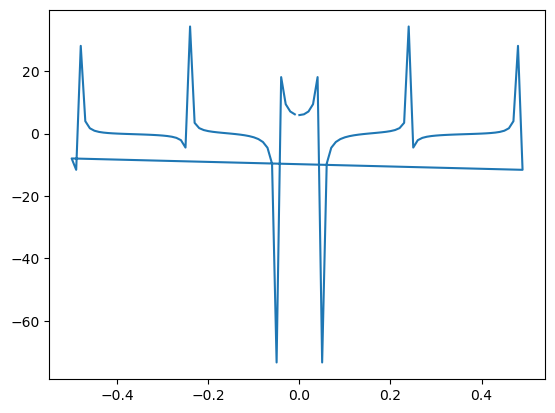

In [30]:
fourier = fftpack.fft(y)
frequences = fftpack.fftfreq(y.size)#lorsqu'on l'utilise on va avoir les fréquence +  et -
plt.plot(frequences, fourier)

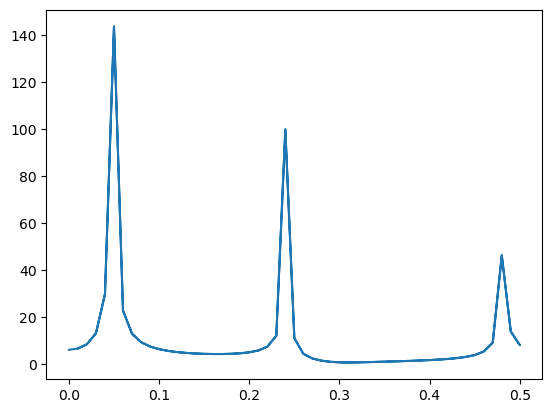

In [31]:
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)
#3 pic qui corréspond à nos fréq.

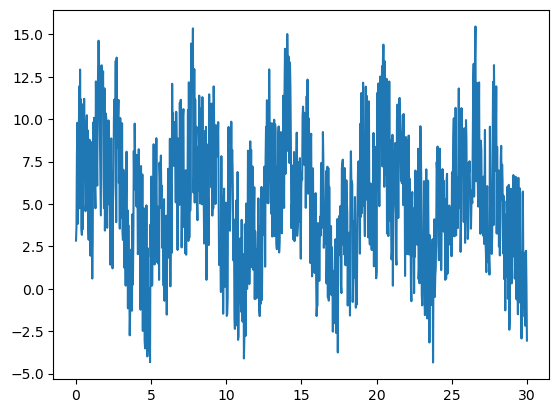

In [32]:
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x, y)

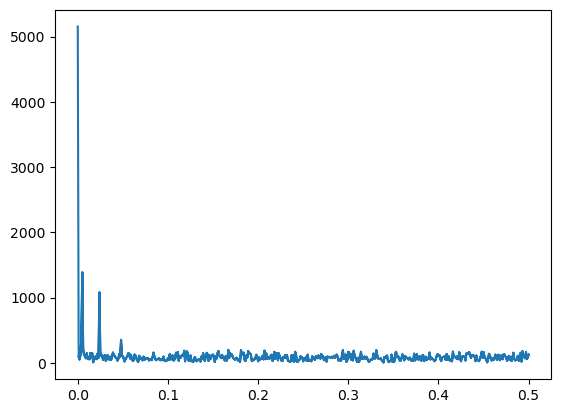

In [33]:
# on va le transformer en spectre, avec pas mal de bruit dedans
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)

In [34]:
#maintenant on va le nettoyer
fourier[power<400] = 0 #pour toute les valeurs égalent à un certain seuils

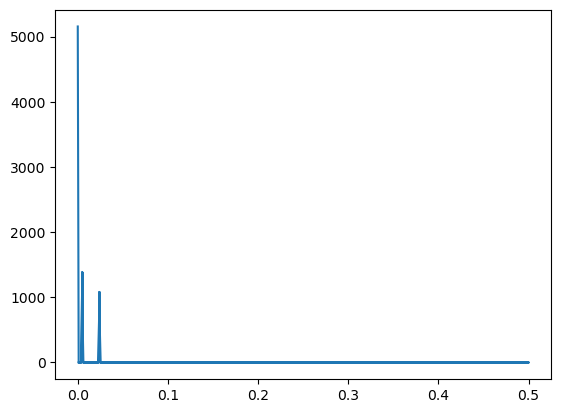

In [35]:
plt.plot(np.abs(frequences), np.abs(fourier))

In [36]:
#on va reprendre ce dernier spectre et le retransformer en fourier inverse
filtered_signal = fftpack.ifft(fourier)#ifft=transformation fourier inverse

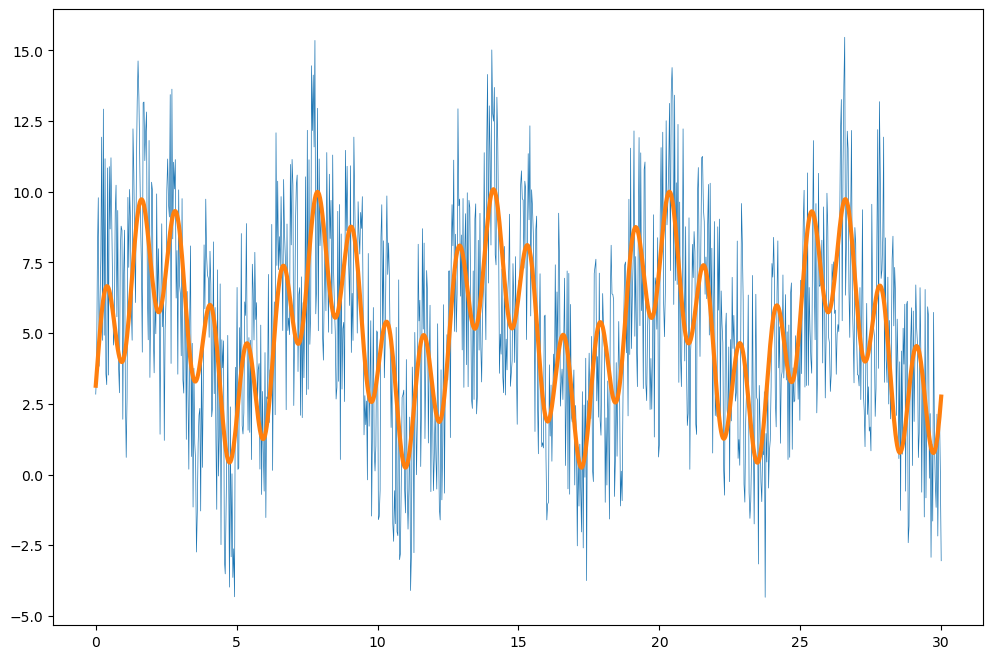

In [37]:
plt.figure(figsize=(12, 8))
plt.plot(x, y, lw=0.5)
plt.plot(x, filtered_signal, lw=3)


In [38]:
#Traitement d'image NDImage
from scipy import ndimage

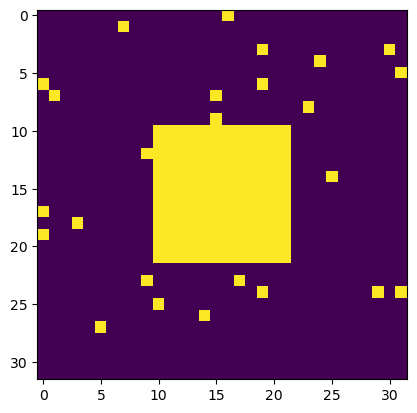

In [39]:
np.random.seed(0)
X = np.zeros((32, 32))
X[10:-10, 10:-10] = 1
X[np.random.randint(0,32,30),np.random.randint(0,32,30)] = 1
plt.imshow(X)

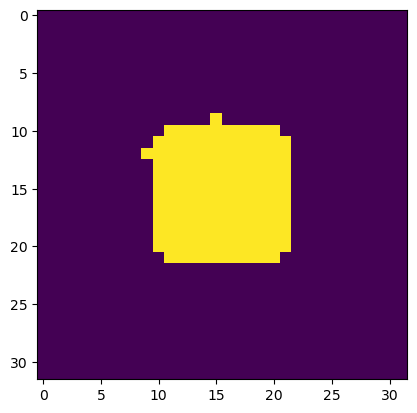

In [40]:
#Ici on va enlever les petits artifacts qu'il y'a sur une image 
open_x = ndimage.binary_opening(X)
plt.imshow(open_x)
#Cependant dans le résultat on a un peu endommager l'image de la structure qui nouys intéresse

In [41]:
#Ona va téléccharger une photo d'une bactérie sur google
#1 essayer d'extraire les bactéries de l'arrière plan de la photo
#2 d'utiliser des techniques de morphologie pour enlver des artifacts qu'il y'a sur la photo
#3 aprèes avoir nettoyer la photo on utilisera une fonction en NDIMAGe pour mesurer la taille de chacune des bactérie qu'on a sur cette photo puis le présnter dans un graphique matplotlib

(507, 537)

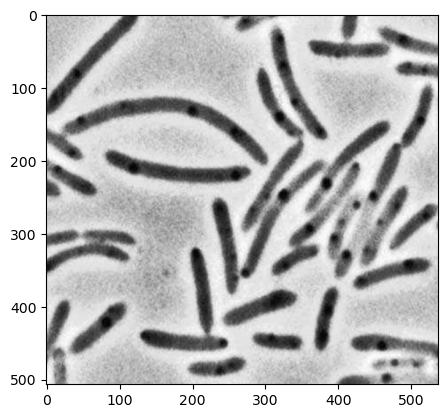

In [42]:
#errors dur to image nedd to fix that then everything falls into place
image = plt.imread('Bacteria.png')
image = image[:,:,0]#subsetting
plt.imshow(image, cmap='gray')
image.shape

(array([3.000e+00, 7.000e+00, 1.500e+01, 3.500e+01, 0.000e+00, 6.500e+01,
        1.030e+02, 1.030e+02, 1.120e+02, 0.000e+00, 1.610e+02, 1.460e+02,
        1.370e+02, 1.450e+02, 0.000e+00, 1.410e+02, 1.660e+02, 1.350e+02,
        0.000e+00, 1.340e+02, 1.590e+02, 1.330e+02, 1.580e+02, 0.000e+00,
        1.590e+02, 1.420e+02, 1.680e+02, 2.000e+02, 0.000e+00, 2.330e+02,
        2.370e+02, 2.350e+02, 2.990e+02, 0.000e+00, 3.240e+02, 3.640e+02,
        3.600e+02, 0.000e+00, 4.430e+02, 4.460e+02, 4.580e+02, 4.540e+02,
        0.000e+00, 4.880e+02, 5.620e+02, 5.530e+02, 5.190e+02, 0.000e+00,
        5.930e+02, 6.360e+02, 6.310e+02, 0.000e+00, 7.320e+02, 7.310e+02,
        8.210e+02, 8.400e+02, 0.000e+00, 9.270e+02, 9.620e+02, 1.010e+03,
        1.092e+03, 0.000e+00, 1.105e+03, 1.120e+03, 1.091e+03, 1.153e+03,
        0.000e+00, 1.252e+03, 1.362e+03, 1.349e+03, 0.000e+00, 1.354e+03,
        1.335e+03, 1.316e+03, 1.308e+03, 0.000e+00, 1.163e+03, 1.153e+03,
        1.076e+03, 1.044e+03, 0.000e+0

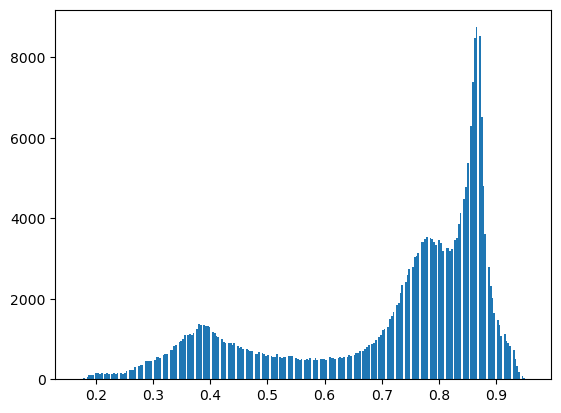

In [43]:
#On va utiliser un Boolean Indexing pour extraire les bacteries de notre aarrière plan
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255)

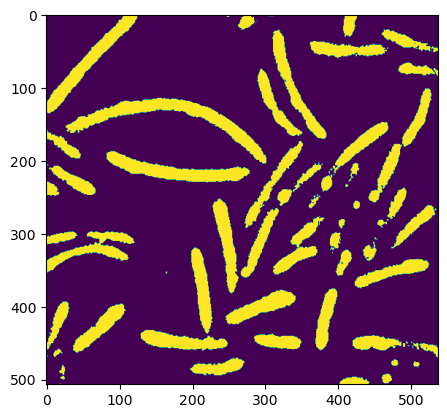

In [44]:
#on va extraire les pixels les plus sombres(les bactéries)
image = image<0.5
plt.imshow(image)

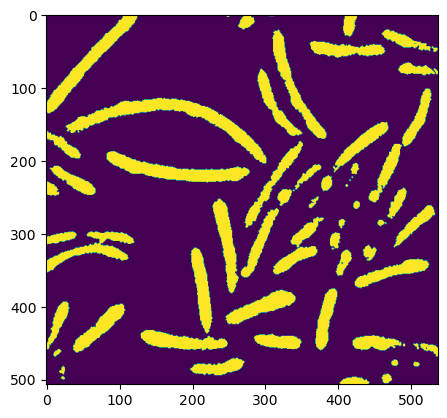

In [46]:
open_x = ndimage.binary_opening(image)
plt.imshow(open_x)

In [47]:
#Utilisation de fonction label pour mettre une étiquette sur chacune des bactéries
label_image, n_labels = ndimage.label(open_x)
print(n_labels)

65


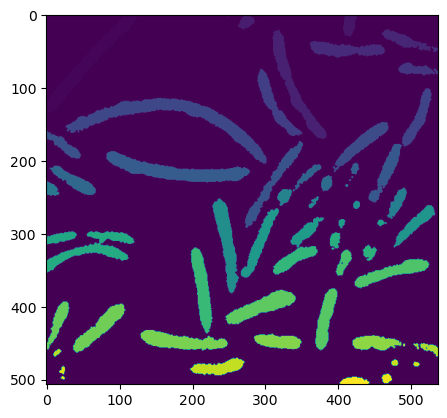

In [48]:
plt.imshow(label_image)

In [49]:
#La fonction SUM de NDIMAGE = PERMETTRE DE COMPTER TOUT LES PIXELS, mésurer la taille relative de chaque bactérie
sizes = ndimage.sum(open_x, label_image, range(n_labels))


In [50]:
sizes

array([   0., 2931.,   23.,   26.,  442.,  298., 2277.,  779., 1466.,
         37.,  542.,   27., 1380., 1112., 4877., 1357.,  640., 1576.,
       1126., 3347.,  123.,  357.,  950.,  248.,    5.,    5.,  251.,
         12.,  512.,  300.,    5.,   93., 2025.,   80.,  935., 1333.,
        668.,   79.,   66.,  459., 2120.,  238.,  255.,  993., 1795.,
          8.,  416., 1548., 1324., 1890.,  761., 1554., 1943.,  998.,
        985.,   11.,   36.,  227.,   66., 1039.,   66.,   44.,   56.,
        139.,   19.])

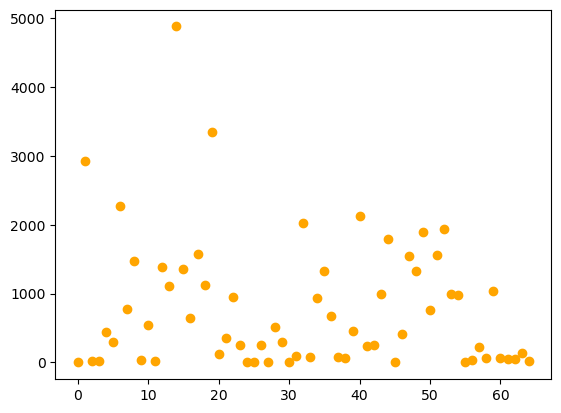

In [51]:
plt.scatter(range(n_labels), sizes, c='orange')